In [1]:
# install java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.2.0/spark-3.2.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.2.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.0-bin-hadoop3.2"

# install findspark using pip
!pip install -q findspark

# install pyspark
!pip3 install pyspark==3.2.0

# install graphframes
!pip3 install graphframes

In [2]:
!cp -v /content/graphframes-0.8.2-spark3.2-s_2.12.jar $SPARK_HOME/jars/

'/content/graphframes-0.8.2-spark3.2-s_2.12.jar' -> '/content/spark-3.2.0-bin-hadoop3.2/jars/graphframes-0.8.2-spark3.2-s_2.12.jar'


In [4]:
#import the packages
from pyspark import *
from pyspark.sql import *
from graphframes import *
import findspark
import pandas as pd

findspark.init()

# Start a Spark session
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [37]:
df = spark.read.option("header",True).csv("Data/officer_partner_allegation.csv")

In [60]:
officers = df.select("officer_id").distinct()
partners = df.select("partner_officer_id").distinct()
partners = partners.withColumnRenamed("partner_officer_id", "officer_id")

In [66]:
nodes = officers.union(partners).distinct()
nodes = nodes.withColumnRenamed("officer_id","id")

In [71]:
edges = df.select(['officer_id','partner_officer_id'])
edges = edges.withColumnRenamed("officer_id", "src")
edges = edges.withColumnRenamed("partner_officer_id", "dst")

In [72]:
g = GraphFrame(nodes, edges)

In [77]:
# NetworkX to visualize the graph
import networkx as nx

def plot_graph(gx):
    g = nx.DiGraph(directed = True)
    
    g = nx.from_pandas_edgelist(gx.edges.toPandas(),'src','dst')
    g.add_nodes_from(gx.vertices.toPandas()['id'])

    nx.draw(g, with_labels=True, arrows = True, node_color='grey')

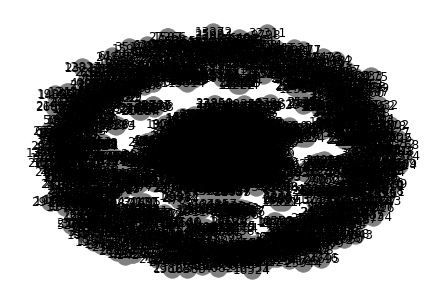

In [78]:
plot_graph(g)

In [84]:
g.inDegrees.sort(['inDegree'],ascending=[0]).show()

+-----+--------+
|   id|inDegree|
+-----+--------+
|13873|      22|
|10420|      15|
|25032|      14|
| 6343|      14|
|18571|      14|
|16606|      11|
| 1744|      11|
|25221|      11|
|13080|      10|
|21492|      10|
| 6235|      10|
| 3549|      10|
|11257|      10|
|13574|      10|
|27222|      10|
|18728|       9|
| 8842|       9|
|22552|       9|
|23041|       9|
| 3004|       9|
+-----+--------+
only showing top 20 rows



In [85]:
g.outDegrees.sort(['outDegree'],ascending=[0]).show()

+-----+---------+
|   id|outDegree|
+-----+---------+
|23171|        9|
| 8366|        9|
|11364|        8|
|24859|        8|
| 3657|        8|
|22552|        8|
| 9370|        8|
|30804|        8|
| 3884|        8|
| 9239|        7|
| 3724|        7|
|19904|        7|
| 3582|        7|
| 9086|        7|
|19499|        7|
|28503|        7|
| 1295|        7|
|22505|        7|
|28795|        7|
|12648|        7|
+-----+---------+
only showing top 20 rows



In [99]:
g.outDegrees.agg({'outDegree':'mean'}).show()

+------------------+
|    avg(outDegree)|
+------------------+
|1.7591407678244972|
+------------------+

